In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, mean_squared_error
import pandas as pd
import numpy as np
from typing import Dict

In [2]:
#data pull
raw_creditg = fetch_openml(name="credit-g")
raw_trans = fetch_openml(name="blood-transfusion-service-center") 
raw_steel= fetch_openml(name="steel-plates-fault")
raw_diabetes= fetch_openml(name="diabetes")

d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the 

In [3]:
df_creditg = pd.DataFrame(raw_creditg.data, columns=raw_creditg.feature_names)
df_creditg_y = pd.DataFrame(raw_creditg.target, columns=raw_creditg.target_names)

df_trans = pd.DataFrame(raw_trans.data, columns=raw_trans.feature_names)
df_trans_y = pd.DataFrame(raw_trans.target, columns=raw_trans.target_names)

df_steel = pd.DataFrame(raw_steel.data, columns=raw_steel.feature_names)
df_steel_y = pd.DataFrame(raw_steel.target, columns=raw_steel.target_names)

df_diabetes = pd.DataFrame(raw_diabetes.data, columns=raw_diabetes.feature_names)
df_diabetes_y = pd.DataFrame(raw_diabetes.target, columns=raw_diabetes.target_names)

df_trans_y, df_steel_y, df_diabetes_y, df_creditg_y

(    Class
 0       2
 1       2
 2       2
 3       2
 4       1
 ..    ...
 743     1
 744     1
 745     1
 746     1
 747     1
 
 [748 rows x 1 columns],
      Class
 0        1
 1        1
 2        1
 3        1
 4        1
 ...    ...
 1936     2
 1937     2
 1938     2
 1939     2
 1940     2
 
 [1941 rows x 1 columns],
                class
 0    tested_positive
 1    tested_negative
 2    tested_positive
 3    tested_negative
 4    tested_positive
 ..               ...
 763  tested_negative
 764  tested_negative
 765  tested_negative
 766  tested_positive
 767  tested_negative
 
 [768 rows x 1 columns],
     class
 0    good
 1     bad
 2    good
 3    good
 4     bad
 ..    ...
 995  good
 996  good
 997  good
 998   bad
 999  good
 
 [1000 rows x 1 columns])

In [4]:
X_train_creditg, X_test_creditg, y_train_creditg, y_test_creditg = train_test_split(df_creditg, df_creditg_y, test_size=0.2, stratify=df_creditg_y)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(df_trans, df_trans_y, test_size=0.2, stratify=df_trans_y)
X_train_steel, X_test_steel, y_train_steel, y_test_steel = train_test_split(df_steel, df_steel_y, test_size=0.2, stratify=df_steel_y)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(df_diabetes, df_diabetes_y, test_size=0.2, stratify=df_diabetes_y)

X_train_creditg, X_train_diabetes, X_train_steel, X_train_trans

(    checking_status  duration                  credit_history  \
 617              <0       6.0  critical/other existing credit   
 213           >=200      30.0              delayed previously   
 581        0<=X<200      12.0  critical/other existing credit   
 171     no checking      12.0                   existing paid   
 690              <0      15.0  critical/other existing credit   
 ..              ...       ...                             ...   
 687        0<=X<200      36.0              delayed previously   
 325              <0       8.0  critical/other existing credit   
 694     no checking      24.0                   existing paid   
 471              <0       6.0                   existing paid   
 22               <0      10.0  critical/other existing credit   
 
                  purpose  credit_amount savings_status employment  \
 617              new car         3676.0           <100     1<=X<4   
 213             business         1908.0           <100        >=7

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
    ])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [6]:
#creditg
numeric_features_creditg = [
    "duration",
    "credit_amount",
    "installment_commitment",
    "residence_since",
    "age",
    "existing_credits",
    "num_dependents"
]
categorical_features_creditg = [
    "checking_status",
    "credit_history",
    "purpose",
    "savings_status",
    "employment",
    "personal_status",
    "other_parties",
    "property_magnitude",
    "other_payment_plans",
    "housing",
    "job",
    "own_telephone",
    "foreign_worker"
]

In [7]:
#df_diabetes
numeric_features_diabetes = [
    "preg",
    "plas",
    "pres",
    "skin",
    "insu",
    "mass",
    "pedi",
    "age"
]

In [8]:
#df_steel
numeric_features_steel = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33"
]

In [9]:
#df_trans
numeric_features_trans = ["V1", "V2", "V3", "V4"]

In [10]:
from sklearn.compose import ColumnTransformer

col_trans_creditg = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_creditg),
    ('cat_pipeline',cat_pipeline, categorical_features_creditg)
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_diabetes = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,numeric_features_diabetes),
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_steel = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_steel),
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_trans),
    ],
    remainder='drop',
    n_jobs=-1)

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

clf_extra = ExtraTreesClassifier()

clf_pipeline_creditg = Pipeline(steps=[
    ('col_trans', col_trans_creditg),
    ('model', clf_extra)
])

clf_pipeline_diabetes = Pipeline(steps=[
    ('col_trans', col_trans_diabetes),
    ('model', clf_extra)
])

clf_pipeline_trans = Pipeline(steps=[
    ('col_trans', col_trans_trans),
    ('model', clf_extra)
])

clf_pipeline_steel = Pipeline(steps=[
    ('col_trans', col_trans_steel),
    ('model', clf_extra)
])

In [12]:
clf_pipeline_creditg.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['duration', 'credit_amount',
                                     'installment_commitment', 'residence_since',
                                     'age', 'existing_credits',
                                     'num_dependents']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False)

In [13]:
from scipy.stats import randint, uniform
model_parameters = {"model__criterion" : ['gini', 'entropy', 'log_loss'], 
                    "model__max_depth": list(range(1, 50)),
                    "model__min_samples_split": randint(low=2, high=50),
                    "model__min_samples_leaf": randint(low=1, high=50),
                    "model__bootstrap": [True, False],
                    "model__max_features":["sqrt", "log2"],
                    "model__min_impurity_decrease":[ 0.0, 0.1, 0.2],
                    "model__min_weight_fraction_leaf": uniform(loc=0.0, scale=0.5),
                    "model__n_estimators": randint(low=50, high=500),
                    }

In [14]:
from sklearn.model_selection import RandomizedSearchCV

random_search_creditg = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_creditg,
    param_distributions=model_parameters,
    n_iter=60,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_diabetes = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_diabetes,
    param_distributions=model_parameters,
    n_iter=60,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_steel = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_steel,
    param_distributions=model_parameters,
    n_iter=60,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_trans = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_trans,
    param_distributions=model_parameters,
    n_iter=60,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

In [15]:
random_search_creditg.fit(X_train_creditg, y_train_creditg)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(estimator=Pipeline(steps=[('col_trans',
                                              ColumnTransformer(n_jobs=-1,
                                                                transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                MinMaxScaler())]),
                                                                               ['duration',
                                                                                'credit_amount',
                                                                                'installment_commitment',
                                                                                'residence_since',
                                                                                'age',
                                                                                'existing_credits',
                                                                                'num_dependents']),
                                                                              ('cat_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleI...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D63542A4C0>,
                                        'model__min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D63542A8B0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D63542ACA0>},
                   random_state=10, return_train_score=True, verbose=1)

In [16]:
random_search_creditg.cv_results_

{'mean_fit_time': array([0.40880513, 0.36448936, 0.11616564, 0.54949975, 0.12420039,
        0.2460124 , 0.11926303, 0.13700686, 0.32049766, 0.25761185,
        0.41860652, 0.07600651, 0.20299911, 0.09654841, 0.27005382,
        0.17691441, 0.14950056, 0.29582572, 0.3392189 , 0.3634192 ,
        0.2505127 , 0.32131696, 0.20939927, 0.09876461, 0.12830071,
        0.11169958, 0.21769934, 0.53560634, 0.34949975, 0.51059985,
        0.27740569, 0.20214376, 0.20989947, 0.36660409, 0.39790921,
        0.28289952, 0.58670006, 0.35679994, 0.43230138, 0.51369262,
        0.3325932 , 0.35809393, 0.16341624, 0.09549451, 0.35858946,
        0.41699915, 0.08880482, 0.2697    , 0.43339996, 0.46609945,
        0.27829733, 0.6187017 , 0.43680458, 0.21580329, 0.168787  ,
        0.37030497, 0.25648732, 0.35460773, 0.51520443, 0.22393041]),
 'std_fit_time': array([0.05762719, 0.00733539, 0.0006507 , 0.03387768, 0.00614049,
        0.00799088, 0.00173014, 0.01480173, 0.018866  , 0.00371377,
        0.004

In [17]:
print("Best Score of train set: "+str(random_search_creditg.best_score_))
print("Best parameter set: "+str(random_search_creditg.best_params_))
print("Test Score: "+str(random_search_creditg.score(X_test_creditg,y_test_creditg)))

Best Score of train set: 0.71125
Best parameter set: {'model__bootstrap': False, 'model__criterion': 'log_loss', 'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 20, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.022130060814120778, 'model__n_estimators': 476}
Test Score: 0.735


Text(0.5, 1.0, 'ROC Curve - ExtraTreesClassifier - credit-g')

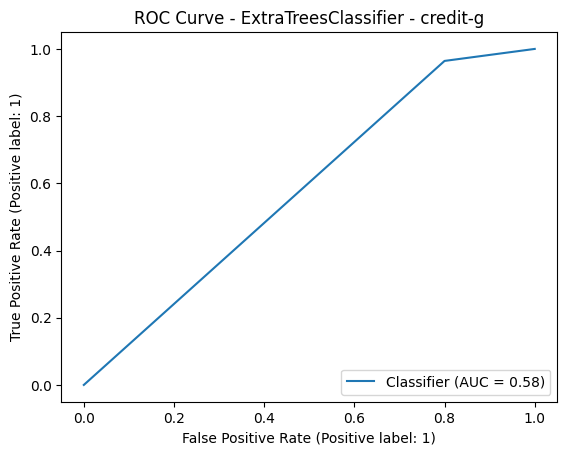

In [18]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
pred_y_test_creditg = random_search_creditg.predict(X_test_creditg)
y_test_creditg_numeric = y_test_creditg['class'].map({'good': 1, 'bad': 0})
pred_y_test_creditg = pd.Series(pred_y_test_creditg)
pred_y_test_creditg = pred_y_test_creditg.map({'good': 1, 'bad': 0})
RocCurveDisplay.from_predictions(y_test_creditg_numeric, pred_y_test_creditg)
plt.title('ROC Curve - ExtraTreesClassifier - credit-g')

In [19]:
import numpy as np
scores_creditg = random_search_creditg.cv_results_["mean_test_score"]
best_score_index_creditg = np.where(scores_creditg == random_search_creditg.best_score_)
number_of_iterations_creditg = best_score_index_creditg[0]
print(number_of_iterations_creditg)

[36]


In [20]:
random_search_diabetes.fit(X_train_diabetes, y_train_diabetes)
random_search_diabetes.cv_results_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'mean_fit_time': array([0.38609991, 0.33591309, 0.109694  , 0.48579979, 0.10541162,
        0.23170533, 0.10619941, 0.11439896, 0.30731206, 0.24481244,
        0.42390676, 0.078899  , 0.19320498, 0.08732638, 0.27219253,
        0.16737781, 0.14320068, 0.29619331, 0.34630709, 0.36831145,
        0.23830533, 0.32320585, 0.21790662, 0.09139881, 0.11430607,
        0.0983932 , 0.1864058 , 0.4706934 , 0.33089414, 0.47858763,
        0.26560664, 0.19850607, 0.19000525, 0.33240042, 0.31000066,
        0.27620683, 0.36799965, 0.28199983, 0.42959952, 0.36899724,
        0.28599296, 0.27949376, 0.15309558, 0.08530698, 0.28850789,
        0.33658848, 0.06249371, 0.1898489 , 0.26749282, 0.37981205,
        0.17428823, 0.30729361, 0.28052988, 0.18811727, 0.15772791,
        0.32639875, 0.21551127, 0.3353261 , 0.48700037, 0.20689898]),
 'std_fit_time': array([0.0247824 , 0.01212934, 0.0045466 , 0.01400927, 0.0052715 ,
        0.00303751, 0.0039549 , 0.00116124, 0.01152963, 0.00490196,
        0.011

In [21]:
print("Best Score of train set: "+str(random_search_diabetes.best_score_))
print("Best parameter set: "+str(random_search_diabetes.best_params_))
print("Test Score: "+str(random_search_diabetes.score(X_test_diabetes,y_test_diabetes)))

Best Score of train set: 0.6628681860589097
Best parameter set: {'model__bootstrap': False, 'model__criterion': 'log_loss', 'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 20, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.022130060814120778, 'model__n_estimators': 476}
Test Score: 0.6688311688311688


Text(0.5, 1.0, 'ROC Curve - ExtraTreesClassifier - diabetes')

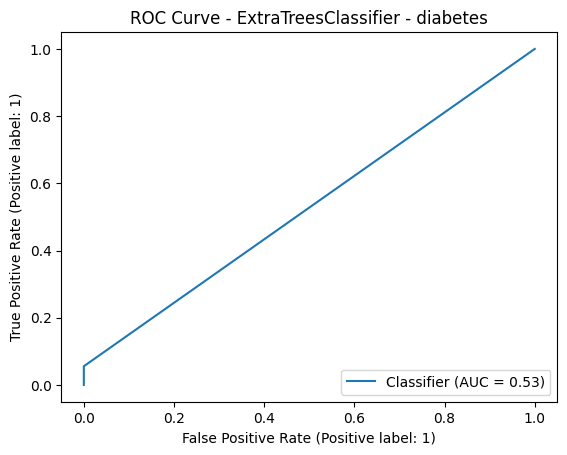

In [22]:
pred_y_test_diabetes = random_search_diabetes.predict(X_test_diabetes)
y_test_diabetes_numeric = y_test_diabetes['class'].map({'tested_negative': 0, 'tested_positive': 1})
pred_y_test_diabetes = pd.Series(pred_y_test_diabetes)
pred_y_test_diabetes = pred_y_test_diabetes.map({'tested_negative': 0, 'tested_positive': 1})
RocCurveDisplay.from_predictions(y_test_diabetes_numeric, pred_y_test_diabetes)
plt.title('ROC Curve - ExtraTreesClassifier - diabetes')

In [23]:
import numpy as np
scores_diabetes = random_search_diabetes.cv_results_["mean_test_score"]
best_score_index_diabetes = np.where(scores_diabetes == random_search_diabetes.best_score_)
number_of_iterations_diabetes = best_score_index_diabetes[0]
print(number_of_iterations_diabetes)

[36]


In [24]:
random_search_steel.fit(X_train_steel, y_train_steel)
random_search_steel.cv_results_
print("Best Score of train set: "+str(random_search_steel.best_score_))
print("Best parameter set: "+str(random_search_steel.best_params_))
print("Test Score: "+str(random_search_steel.score(X_test_steel,y_test_steel)))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Score of train set: 0.9903329530131728
Best parameter set: {'model__bootstrap': False, 'model__criterion': 'log_loss', 'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 20, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.022130060814120778, 'model__n_estimators': 476}
Test Score: 0.9845758354755784


Text(0.5, 1.0, 'ROC Curve - ExtraTreesClassifier - steel-plates-fault')

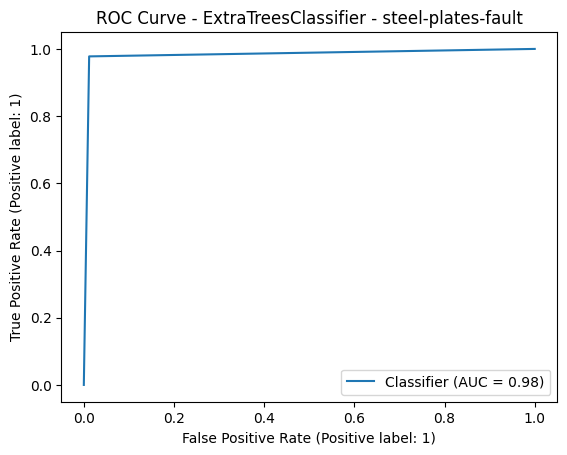

In [25]:
pred_y_test_steel = random_search_steel.predict(X_test_steel)
y_test_steel_numeric = y_test_steel['Class'].map({'1': 0, '2': 1})
pred_y_test_steel = pd.Series(pred_y_test_steel)
pred_y_test_steel = pred_y_test_steel.map({'1': 0, '2': 1})
RocCurveDisplay.from_predictions(y_test_steel_numeric, pred_y_test_steel)
plt.title('ROC Curve - ExtraTreesClassifier - steel-plates-fault')

In [26]:
score_steel = random_search_steel.cv_results_["mean_test_score"]
best_score_index_steel = np.where(score_steel == random_search_steel.best_score_)
number_of_iterations_steel = best_score_index_steel[0]
print(number_of_iterations_steel)

[36]


In [27]:
random_search_trans.fit(X_train_trans, y_train_trans)
random_search_trans.cv_results_
print("Best Score of train set: "+str(random_search_trans.best_score_))
print("Best parameter set: "+str(random_search_trans.best_params_))
print("Test Score: "+str(random_search_trans.score(X_test_trans,y_test_trans)))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Score of train set: 0.762549019607843
Best parameter set: {'model__bootstrap': False, 'model__criterion': 'entropy', 'model__max_depth': 37, 'model__max_features': 'log2', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 29, 'model__min_samples_split': 27, 'model__min_weight_fraction_leaf': 0.29166086846886813, 'model__n_estimators': 463}
Test Score: 0.76


Text(0.5, 1.0, 'ROC Curve - ExtraTreesClassifier - blood-transfusion-service-center')

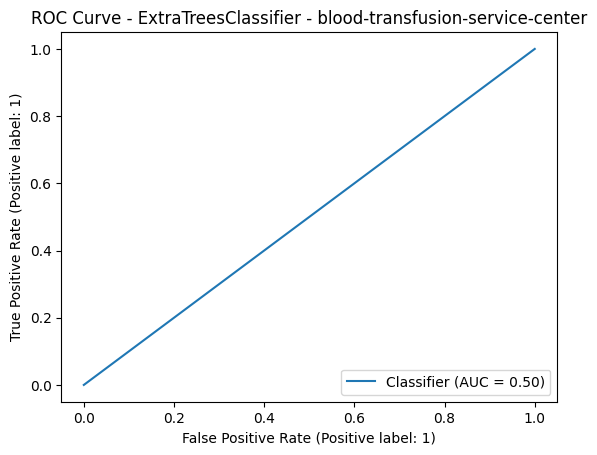

In [28]:
pred_y_test_trans = random_search_trans.predict(X_test_trans)
y_test_trans_numeric = y_test_trans['Class'].map({'1': 0, '2': 1})
pred_y_test_trans = pd.Series(pred_y_test_trans)
pred_y_test_trans = pred_y_test_trans.map({'1': 0, '2': 1})
RocCurveDisplay.from_predictions(y_test_trans_numeric, pred_y_test_trans)
plt.title('ROC Curve - ExtraTreesClassifier - blood-transfusion-service-center')

In [29]:
score_trans = random_search_trans.cv_results_["mean_test_score"]
best_score_index_trans = np.where(score_trans == random_search_trans.best_score_)
number_of_iterations_trans = best_score_index_trans[0]
print(number_of_iterations_trans)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


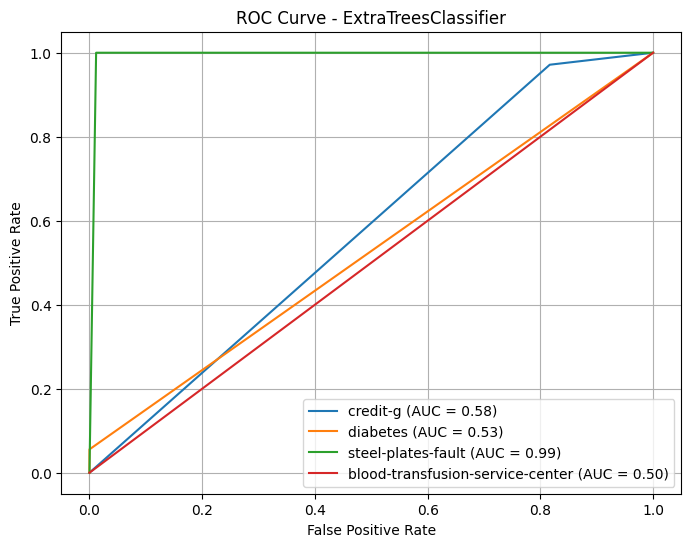

In [97]:
# summary ROC chart
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, _ = roc_curve(y_test_creditg_numeric, pred_y_test_creditg)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_diabetes_numeric, pred_y_test_diabetes)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test_steel_numeric, pred_y_test_steel)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test_trans_numeric, pred_y_test_trans)
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves\n",
plt.figure(figsize=(8, 6))

plt.plot(fpr1, tpr1, label=f'credit-g (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'diabetes (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'steel-plates-fault (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'blood-transfusion-service-center (AUC = {roc_auc4:.2f})')

# Customize the plot\n",
plt.title('ROC Curve - ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

plt.show()

In [30]:
params_arr = random_search_creditg.cv_results_["params"]
numbered_params_arr = list(range(len(params_arr)))
mean_test = []
for i in range(len(random_search_creditg.cv_results_["mean_test_score"])):
    mean_test.append(np.mean(
        [
            random_search_creditg.cv_results_["mean_test_score"][i],
            random_search_diabetes.cv_results_["mean_test_score"][i],
            random_search_steel.cv_results_["mean_test_score"][i],
            random_search_trans.cv_results_["mean_test_score"][i]
        ]
    ))

scd = dict(zip(numbered_params_arr, mean_test))
scd
crb = -1
crbi = -1
for key, val in scd.items():
    if key > crb:
        crb = key
key, scd[key], params_arr[key], mean_test

(59,
 0.6918432689870089,
 {'model__bootstrap': True,
  'model__criterion': 'log_loss',
  'model__max_depth': 15,
  'model__max_features': 'log2',
  'model__min_impurity_decrease': 0.1,
  'model__min_samples_leaf': 45,
  'model__min_samples_split': 41,
  'model__min_weight_fraction_leaf': 0.10958925226022204,
  'model__n_estimators': 183},
 [0.6918432689870089,
  0.7446965566730754,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6934535791208125,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089

In [31]:
import ConfigSpace as CS
from sklearn.model_selection import cross_val_score
from smac.facade import HyperparameterOptimizationFacade, BlackBoxFacade
from smac.scenario import Scenario
from sklearn.model_selection import GridSearchCV

In [32]:
cs = CS.ConfigurationSpace()
model__bootstrap = CS.CategoricalHyperparameter("model__bootstrap", choices=[True, False])
model__criterion = CS.CategoricalHyperparameter("model__criterion", choices=['gini', 'entropy', 'log_loss'])
model__max_depth = CS.UniformIntegerHyperparameter("model__max_depth", 1, 50, default_value=10)
model__max_features = CS.CategoricalHyperparameter("model__max_features", choices=["sqrt", "log2"])
model__min_impurity_decrease = CS.CategoricalHyperparameter("model__min_impurity_decrease",choices=[0.0, 0.1, 0.2])
model__min_samples_leaf = CS.UniformIntegerHyperparameter("model__min_samples_leaf", 1, 50, default_value=5)
model__min_samples_split = CS.UniformIntegerHyperparameter("model__min_samples_split", 2, 50, default_value=5)
model__min_weight_fraction_leaf = CS.UniformFloatHyperparameter("model__min_weight_fraction_leaf", 0.0, 0.5, default_value=0.25)
model__n_estimators = CS.UniformIntegerHyperparameter("model__n_estimators", 50, 500)
cs.add_hyperparameters(
        [
            model__bootstrap,
            model__criterion,
            model__max_depth,
            model__max_features,
            model__min_impurity_decrease,
            model__min_samples_leaf,
            model__min_samples_split,
            model__min_weight_fraction_leaf,
            model__n_estimators,
        ]
    )

[model__bootstrap, Type: Categorical, Choices: {True, False}, Default: True,
 model__criterion, Type: Categorical, Choices: {gini, entropy, log_loss}, Default: gini,
 model__max_depth, Type: UniformInteger, Range: [1, 50], Default: 10,
 model__max_features, Type: Categorical, Choices: {sqrt, log2}, Default: sqrt,
 model__min_impurity_decrease, Type: Categorical, Choices: {0.0, 0.1, 0.2}, Default: 0.0,
 model__min_samples_leaf, Type: UniformInteger, Range: [1, 50], Default: 5,
 model__min_samples_split, Type: UniformInteger, Range: [2, 50], Default: 5,
 model__min_weight_fraction_leaf, Type: UniformFloat, Range: [0.0, 0.5], Default: 0.25,
 model__n_estimators, Type: UniformInteger, Range: [50, 500], Default: 275]

In [33]:
def objective_function_creditg(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_creditg.set_params(**config)
    scores = cross_val_score(clf_pipeline_creditg, X=X_train_creditg, y=y_train_creditg, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_diabetes(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_diabetes.set_params(**config)
    scores = cross_val_score(clf_pipeline_diabetes, X=X_train_diabetes, y=y_train_diabetes, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_steel(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_steel.set_params(**config)
    scores = cross_val_score(clf_pipeline_steel, X=X_train_steel, y=y_train_steel, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_trans(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_trans.set_params(**config)
    scores = cross_val_score(clf_pipeline_trans, X=X_train_trans, y=y_train_trans, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

In [34]:
scenario = Scenario(
    configspace=cs,
    seed=0,
    deterministic=True,
)
model = HyperparameterOptimizationFacade.get_model(scenario=scenario)
init_des = HyperparameterOptimizationFacade.get_initial_design(scenario=scenario)

In [35]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_creditg, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)


incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 90 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][abstract_intensifier.py:515] Added config 8fe185 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

(Configuration(values={
   'model__bootstrap': True,
   'model__criterion': 'entropy',
   'model__max_depth': 6,
   'model__max_features': 'sqrt',
   'model__min_impurity_decrease': 0.2,
   'model__min_samples_leaf': 25,
   'model__min_samples_split': 49,
   'model__min_weight_fraction_leaf': 0.4983903025276959,
   'model__n_estimators': 398,
 }),
 'Incumbent cost: 0.30000000000000004',
 'Default cost: inf')

In [36]:
config = {
   'bootstrap': True,
   'criterion': 'entropy',
   'max_depth': 6,
   'max_features': 'sqrt',
   'min_impurity_decrease': 0.2,
   'min_samples_leaf': 25,
   'min_samples_split': 49,
   'min_weight_fraction_leaf': 0.4983903025276959,
   'n_estimators': 398,
 }
clf_pipeline_creditg = Pipeline(steps=[
    ('col_trans', col_trans_creditg),
    ('model', ExtraTreesClassifier(**config))
])
clf_pipeline_creditg.fit(X=X_train_creditg, y=y_train_creditg)

print("Test Score: "+str(clf_pipeline_creditg.score(X_test_creditg,y_test_creditg)))

d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Score: 0.7


In [37]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_creditg = GridSearchCV(
    estimator=clf_pipeline_creditg,
    param_grid=cfd,
)
gsp_creditg.fit(X_train_creditg, y_train_creditg)
print("Best Score of train set: "+str(gsp_creditg.best_score_))

C:\Users\Mieszko\AppData\Local\Temp\ipykernel_9268\1902329016.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best Score of train set: 0.72


In [38]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_diabetes, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 90 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][abstract_intensifier.py:515] Added config 8fe185 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

(Configuration(values={
   'model__bootstrap': True,
   'model__criterion': 'entropy',
   'model__max_depth': 6,
   'model__max_features': 'sqrt',
   'model__min_impurity_decrease': 0.2,
   'model__min_samples_leaf': 25,
   'model__min_samples_split': 49,
   'model__min_weight_fraction_leaf': 0.4983903025276959,
   'model__n_estimators': 398,
 }),
 'Incumbent cost: 0.34852725576436094',
 'Default cost: inf')

In [39]:
config = {
   'bootstrap': True,
   'criterion': 'entropy',
   'max_depth': 6,
   'max_features': 'sqrt',
   'min_impurity_decrease': 0.2,
   'min_samples_leaf': 25,
   'min_samples_split': 49,
   'min_weight_fraction_leaf': 0.4983903025276959,
   'n_estimators': 398,
 }
clf_pipeline_diabetes = Pipeline(steps=[
    ('col_trans', col_trans_diabetes),
    ('model', ExtraTreesClassifier(**config))
])
clf_pipeline_diabetes.fit(X=X_train_diabetes, y=y_train_diabetes)

print("Test Score: "+str(clf_pipeline_diabetes.score(X_test_diabetes,y_test_diabetes)))

d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Score: 0.6493506493506493


In [40]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_diabetes = GridSearchCV(
    estimator=clf_pipeline_diabetes,
    param_grid=cfd,
)
gsp_diabetes.fit(X_train_diabetes, y_train_diabetes)
print("Best Score of train set: "+str(gsp_diabetes.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_9268\2751828384.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best Score of train set: 0.7524456883913102


In [41]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_steel, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 90 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][abstract_intensifier.py:515] Added config 8fe185 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

(Configuration(values={
   'model__bootstrap': True,
   'model__criterion': 'entropy',
   'model__max_depth': 6,
   'model__max_features': 'sqrt',
   'model__min_impurity_decrease': 0.2,
   'model__min_samples_leaf': 25,
   'model__min_samples_split': 49,
   'model__min_weight_fraction_leaf': 0.4983903025276959,
   'model__n_estimators': 398,
 }),
 'Incumbent cost: 0.34664868789544667',
 'Default cost: inf')

In [42]:
config = {
   'bootstrap': True,
   'criterion': 'entropy',
   'max_depth': 6,
   'max_features': 'sqrt',
   'min_impurity_decrease': 0.2,
   'min_samples_leaf': 25,
   'min_samples_split': 49,
   'min_weight_fraction_leaf': 0.4983903025276959,
   'n_estimators': 398,
 }
clf_pipeline_steel = Pipeline(steps=[
    ('col_trans', col_trans_steel),
    ('model', ExtraTreesClassifier(**config))
])
clf_pipeline_steel.fit(X=X_train_steel, y=y_train_steel)

print("Test Score: "+str(clf_pipeline_steel.score(X_test_steel, y_test_steel)))

d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Score: 0.6529562982005142


In [43]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_steel = GridSearchCV(
    estimator=clf_pipeline_steel,
    param_grid=cfd,
)
gsp_steel.fit(X_train_steel, y_train_steel)
print("Best Score of train set: "+str(gsp_steel.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_9268\664847083.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

Best Score of train set: 0.995490094388549


In [44]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_trans, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 90 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][abstract_intensifier.py:515] Added config 8fe185 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

(Configuration(values={
   'model__bootstrap': True,
   'model__criterion': 'entropy',
   'model__max_depth': 6,
   'model__max_features': 'sqrt',
   'model__min_impurity_decrease': 0.2,
   'model__min_samples_leaf': 25,
   'model__min_samples_split': 49,
   'model__min_weight_fraction_leaf': 0.4983903025276959,
   'model__n_estimators': 398,
 }),
 'Incumbent cost: 0.23745098039215695',
 'Default cost: inf')

In [45]:
config = {
   'bootstrap': True,
   'criterion': 'entropy',
   'max_depth': 6,
   'max_features': 'sqrt',
   'min_impurity_decrease': 0.2,
   'min_samples_leaf': 25,
   'min_samples_split': 49,
   'min_weight_fraction_leaf': 0.4983903025276959,
   'n_estimators': 398,
 }
clf_pipeline_trans = Pipeline(steps=[
    ('col_trans', col_trans_trans),
    ('model', ExtraTreesClassifier(**config))
])
clf_pipeline_trans.fit(X=X_train_trans, y=y_train_trans)

print("Test Score: "+str(clf_pipeline_trans.score(X_test_trans,y_test_trans)))

d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Score: 0.76


In [46]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_trans = GridSearchCV(
    estimator=clf_pipeline_trans,
    param_grid=cfd,
)
gsp_trans.fit(X_train_trans, y_train_trans)
print("Best Score of train set: "+str(gsp_trans.best_score_))

C:\Users\Mieszko\AppData\Local\Temp\ipykernel_9268\348057159.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\aml\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

Best Score of train set: 0.762549019607843


In [47]:
import numpy as np
params_arr = gsp_creditg.cv_results_["params"]
numbered_params_arr = list(range(len(params_arr)))
mean_test = []
for i in range(len(gsp_creditg.cv_results_["mean_test_score"])):
    mean_test.append(np.mean(
        [
            gsp_creditg.cv_results_["mean_test_score"][i],
            gsp_diabetes.cv_results_["mean_test_score"][i],
            gsp_steel.cv_results_["mean_test_score"][i],
            gsp_trans.cv_results_["mean_test_score"][i]
        ]
    ))

mean_test

scd = dict(zip(numbered_params_arr, mean_test))
scd
crb = -1
crbi = -1
for key, val in scd.items():
    if key > crb:
        crb = key
key, scd[key], params_arr[key], mean_test

(99,
 0.6918432689870089,
 {'model__bootstrap': True,
  'model__criterion': 'entropy',
  'model__max_depth': 39,
  'model__max_features': 'sqrt',
  'model__min_impurity_decrease': 0.2,
  'model__min_samples_leaf': 32,
  'model__min_samples_split': 10,
  'model__min_weight_fraction_leaf': 0.25781917332562587,
  'model__n_estimators': 268},
 [0.6918432689870089,
  0.6918432689870089,
  0.7393627171770307,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.7903306101299694,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,
  0.6918432689870089,